In [5]:
!pip install -U diffusers==0.29.0 transformers scipy ftfy accelerate scipy==1.14.1
!pip install "jax[cuda12_pip]==0.4.27" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
  Using cached jax-0.4.27-py3-none-any.whl.metadata (23 kB)
  Using cached https://storage.googleapis.com/jax-releases/cuda12/jaxlib-0.4.27%2Bcuda12.cudnn89-cp310-cp310-manylinux2014_x86_64.whl (143.4 MB)
Using cached jax-0.4.27-py3-none-any.whl (1.9 MB)
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.23+cuda12.cudnn89
    Uninstalling jaxlib-0.4.23+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.23+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.23
    Uninstalling jax-0.4.23:
      Successfully uninstalled jax-0.4.23


/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

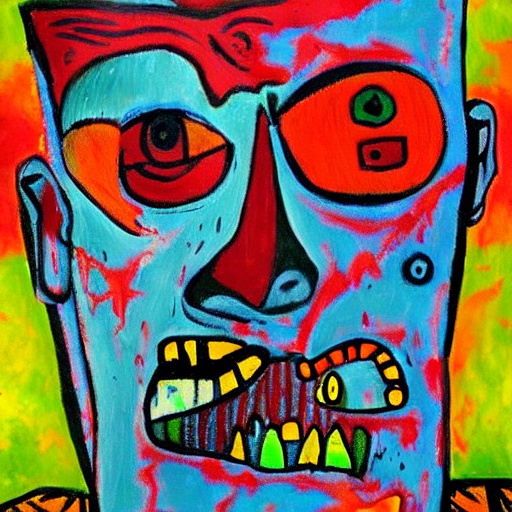

In [6]:
import torch
import transformers
from diffusers import StableDiffusionPipeline
#import torch_xla
#import torch_xla.core.xla_model as xm

#dev = xm.xla_device()
dev = "cuda"

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

pipe = pipe.to(dev)
prompt = "a zombie in the style of Picasso"
image = pipe(prompt).images[0]


image

In [8]:
pipe.components.keys()


dict_keys(['vae', 'text_encoder', 'tokenizer', 'unet', 'scheduler', 'safety_checker', 'feature_extractor', 'image_encoder'])

In [9]:
prompt = "a zombie in the style of Picasso"
images = pipe(prompt, num_images_per_prompt=3).images

  0%|          | 0/50 [00:00<?, ?it/s]

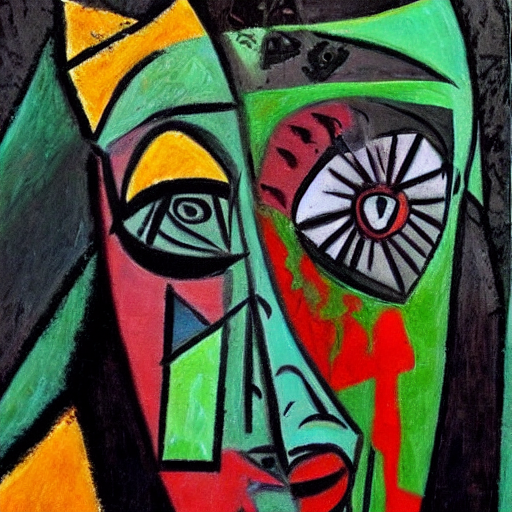

In [10]:
images[0]

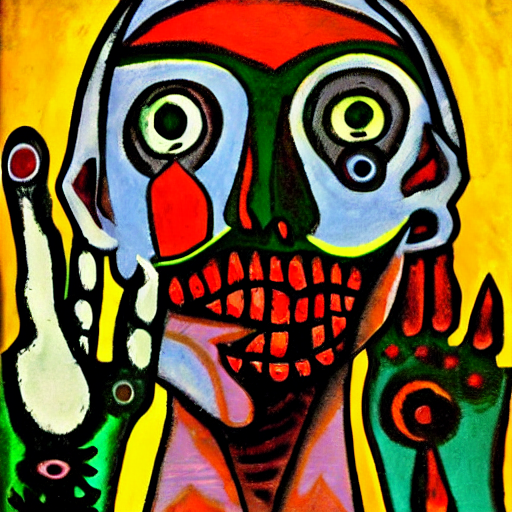

In [11]:
images[1]

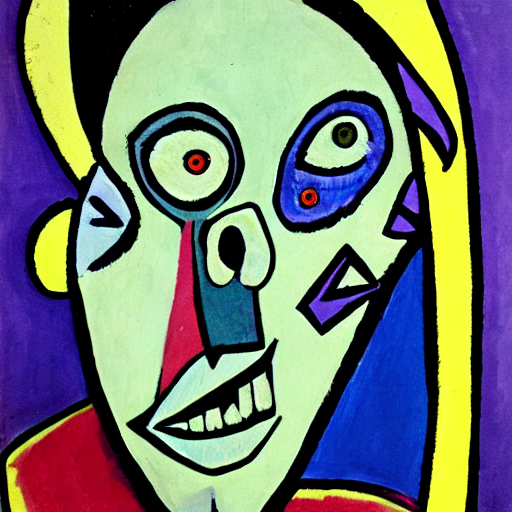

In [12]:
images[2]

In [13]:
pipe.components['scheduler']

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.29.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [14]:
prompt = ""
images = pipe(prompt, num_images_per_prompt=3).images

  0%|          | 0/50 [00:00<?, ?it/s]

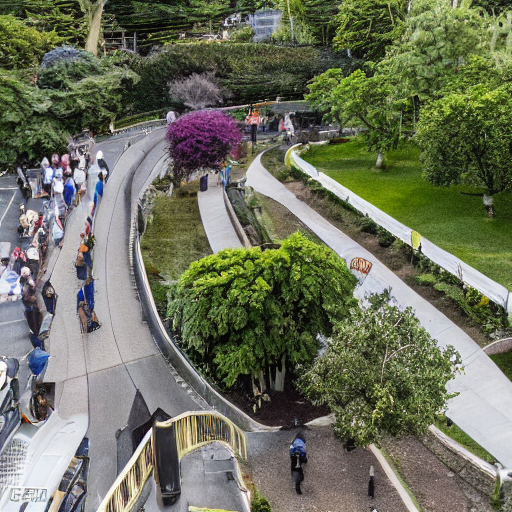

In [15]:
images[1]

In [16]:
prompt = "a dead body"
images = pipe(prompt, num_images_per_prompt=3).images

  0%|          | 0/50 [00:00<?, ?it/s]

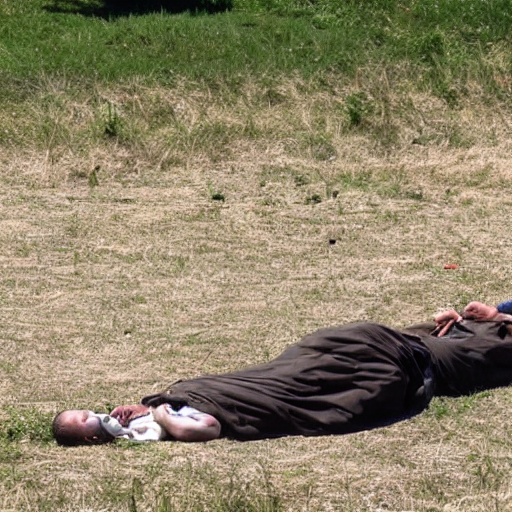

In [17]:
images[2]

In [18]:
pipe.components['tokenizer'](prompt)

{'input_ids': [49406, 320, 2747, 1774, 49407], 'attention_mask': [1, 1, 1, 1, 1]}

In [19]:
pipe.components['tokenizer'].encoder

{'!': 0,
 '!!': 1443,
 '!!!': 11194,
 '!!!!': 4003,
 '!!!!!!!!': 11281,
 '!!!!!!!!!!!!!!!!': 30146,
 '!!!!!!!!!!!</w>': 49339,
 '!!!!!!!!!!</w>': 35579,
 '!!!!!!!!!</w>': 28560,
 '!!!!!!!!</w>': 21622,
 '!!!!!!!</w>': 15203,
 '!!!!!!</w>': 9168,
 '!!!!!</w>': 5203,
 '!!!!</w>': 2360,
 '!!!"</w>': 28048,
 '!!!)</w>': 42532,
 '!!!</w>': 995,
 '!!"</w>': 20556,
 '!!#</w>': 34997,
 '!!)</w>': 28352,
 '!!</w>': 748,
 '!!@</w>': 40705,
 '!"</w>': 2947,
 '!"@</w>': 43819,
 '!#</w>': 9670,
 "!'</w>": 13222,
 '!),</w>': 37904,
 '!).</w>': 26225,
 '!)</w>': 4571,
 '!*</w>': 37737,
 '!,</w>': 29325,
 '!-</w>': 43499,
 '!...</w>': 22121,
 '!..</w>': 35475,
 '!.</w>': 22517,
 '!:)</w>': 31671,
 '!:</w>': 17545,
 '!</w>': 256,
 '!?!</w>': 29767,
 '!?!?</w>': 47081,
 '!?</w>': 6004,
 '!@</w>': 15117,
 '!]</w>': 34466,
 '!âĢ¦</w>': 35068,
 '!âĿ¤ï¸ı</w>': 32559,
 '!ðŁİī</w>': 49085,
 '!ðŁĺĬ</w>': 43434,
 '!ðŁĺį</w>': 36438,
 '"': 1,
 '"!</w>': 10377,
 '""': 41530,
 '"""</w>': 25539,
 '""</w>': 8575,
 '

In [20]:
pipe.components['text_encoder']

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), ep

In [21]:
#prompt = ["a zombie in the style of picasso"]
prompt = ["""A zombie in the style of Monet. The zombie is dressed in a
farmer's outfit and holds a paintbrush and canvas. The sun is setting,
and there are mountains in the distance. The hay in the
 field in which the zombie is standing comes up to its waist. There are red flowers in the field"""]

with torch.no_grad():

  encoded_prompt = pipe.components['text_encoder'](
      pipe.components['tokenizer'](prompt, return_tensors="pt",
                                   max_length=pipe.components['tokenizer'].model_max_length,
                                   truncation=True).input_ids.to("cuda")
  )[0]



  blank_prompt = pipe.components['text_encoder'](
      pipe.components['tokenizer']("", return_tensors="pt",
                                   padding="max_length",
                                   max_length=pipe.components['tokenizer'](prompt,
                                                                        return_tensors="pt",
                                   max_length=pipe.components['tokenizer'].model_max_length,
                                   truncation=True).input_ids.shape[-1],
                                   truncation=True).input_ids.to("cuda")
  )[0]

encoded_prompt.shape


torch.Size([1, 64, 768])

In [22]:
pipe.components['vae'].encoder

Encoder(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (down_blocks): ModuleList(
    (0): DownEncoderBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
    )
    (1): DownEncoderBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [23]:
import torchvision.transforms.functional as tf

pipe.components['vae'].encoder(tf.to_tensor(image).half().unsqueeze(0).to("cuda"))

tensor([[[[  2.8164,   4.9766,   3.8027,  ...,   2.9629,   2.5879,   5.0664],
          [  4.6445,   4.9961,  -5.0156,  ...,   7.6094,   3.4609,   7.9727],
          [  5.0078,   4.7734,   1.8496,  ...,   4.0352,   2.7500,   6.1445],
          ...,
          [  4.5312,   4.1484,   8.7031,  ...,  -4.0078,   0.8193,  -0.6567],
          [  9.7578,  -0.3718,  -3.3496,  ...,  -2.2559,  -0.0431,   1.7852],
          [ -2.5410,  -2.1582,   2.1680,  ...,  -2.4160,   2.7324,  -3.8555]],

         [[ -2.0391,   0.3315,   5.6445,  ...,   0.7905,  -0.6118,   2.4863],
          [ -0.2369,   9.3359,  -5.6406,  ...,   9.0781,   1.1289,   4.1406],
          [  4.2148,   2.1094,  -2.3945,  ...,   5.8906,  -2.8418,   8.8516],
          ...,
          [ -0.8467,  -2.7637,   8.0312,  ...,  -5.1992,   2.9863, -16.4375],
          [ 11.2734,   1.5410,  -2.8242,  ...,  -1.7090,  -6.4258,   4.2969],
          [ -1.7666,  -7.3047,  -1.2295,  ...,  -5.1133,   4.3242,  -7.6758]],

         [[ -6.2539,  -9.4375,

In [24]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [25]:
import torchvision
import torchvision.transforms.functional as tf
latent=pipe.components['vae'].encode(tf.to_tensor(image).half().unsqueeze(0).to("cuda"))
z = latent.latent_dist.sample()
z.shape


torch.Size([1, 4, 64, 64])

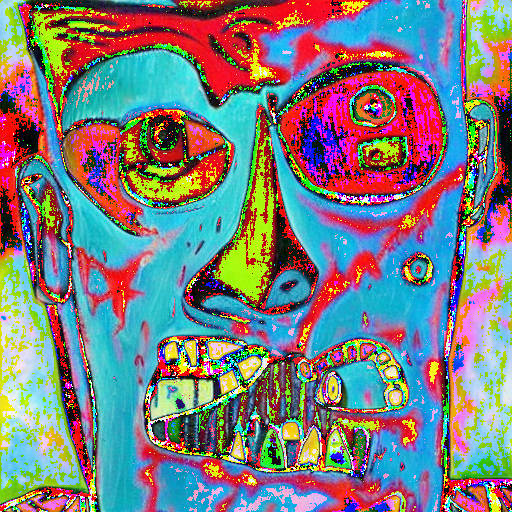

In [26]:
to_image = torchvision.transforms.ToPILImage()
to_image(pipe.components['vae'].decode(z).sample.detach()[0])

In [27]:
from torchvision.transforms.transforms import RandomChoice
from tqdm.auto import tqdm
from torch import autocast

#generator = torch.manual_seed(0)

generator = None

random = torch.randn((1,4,64,64),generator=generator).to("cuda").half()
random = random * pipe.components["scheduler"].init_noise_sigma

text_embeddings = torch.cat([blank_prompt, encoded_prompt])
guidance_scale = 7.5

pipe.components["scheduler"].set_timesteps(99)

for t in tqdm(pipe.components["scheduler"].timesteps):
    random_expanded = torch.cat([random] * 2)

    with torch.no_grad():
      noise_pred = pipe.components['unet'](random_expanded, t,
                                           encoder_hidden_states=text_embeddings).sample
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
    random = pipe.components["scheduler"].step(noise_pred, t, random).prev_sample




  0%|          | 0/100 [00:00<?, ?it/s]

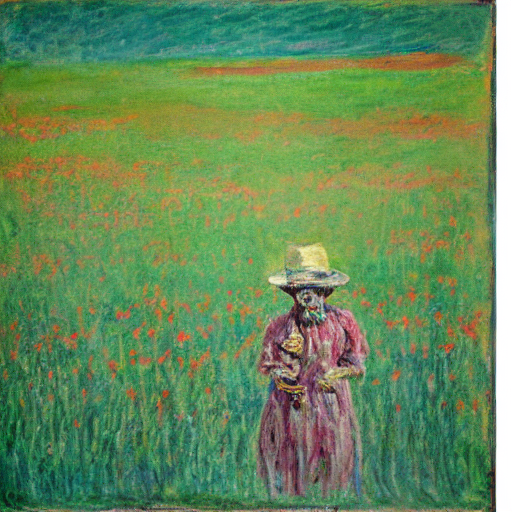

In [28]:
import torchvision
from PIL import Image

to_image = torchvision.transforms.ToPILImage()

with torch.no_grad():

  image = pipe.components['vae'].decode(1 / 0.18215 * random).sample[0]
to_image((image / 2 + 0.5).clamp(0, 1))

